# Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'white'

# Loading the dataset

In [2]:
automobile = pd.read_csv('/Users/marwahfaraj/Desktop/dsi_galvanize/project/Automobile_Price_prediction/Automobile_data.csv')
automobile.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


# Read the dataset

# listing the data coloumns

In [3]:
automobile.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# showing the data set information

In [4]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# showing the statstics of the data set

In [5]:
automobile.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.83,1.25,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.76,6.02,86.6,94.5,97.0,102.4,120.9
length,205.0,174.05,12.34,141.1,166.3,173.2,183.1,208.1
width,205.0,65.91,2.15,60.3,64.1,65.5,66.9,72.3
height,205.0,53.72,2.44,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.57,520.68,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.91,41.64,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.14,3.97,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.22,6.54,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.75,6.89,16.0,25.0,30.0,34.0,54.0


# Cleaning the data

After descibing the data I found some coloumn is missing

In [6]:
automobile.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

After checking null values it appers that there is no null value but why some columns still missing

# Targeting the coloumns 


targeting 'normalized-losses' cloumn and found '?' in it

In [7]:
automobile['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
104     6
128     6
134     6
95      5
85      5
65      5
102     5
168     5
74      5
94      5
103     5
148     4
122     4
106     4
118     4
93      4
154     3
137     3
83      3
101     3
125     3
115     3
110     2
192     2
164     2
197     2
89      2
194     2
158     2
81      2
129     2
119     2
108     2
87      2
113     2
188     2
153     2
145     2
121     1
90      1
78      1
77      1
256     1
142     1
107     1
98      1
186     1
231     1
Name: normalized-losses, dtype: int64

trgeting 'num-of-doors' coloumn and found '?' in it

In [8]:
automobile['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

Replace the coulmn values with their respective numeric values.

In [9]:
automobile['num-of-doors'] = automobile['num-of-doors'].replace({'four':4, 'two':2, '?':4})
automobile['num-of-doors'].value_counts()

4    116
2     89
Name: num-of-doors, dtype: int64

Notice the 'num-of-cylinders' column also the value need to be changed to the respective numeric value

In [10]:
automobile['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [11]:
automobile['num-of-cylinders'] = automobile['num-of-cylinders'].replace({'twelve':12, 'eight':8, 'six':6, 'five':5, 'four':4, 'three':3, 'two':2})
automobile['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

targeting horsepower coloumn and found '?' in it

In [12]:
automobile.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
62      6
114     6
160     6
101     6
88      6
145     5
84      5
76      5
102     5
97      5
82      5
123     4
86      4
111     4
92      4
73      3
152     3
207     3
85      3
182     3
90      3
121     3
56      2
156     2
162     2
52      2
161     2
?       2
184     2
176     2
112     2
100     2
155     2
94      2
135     1
115     1
175     1
154     1
106     1
288     1
58      1
48      1
120     1
140     1
262     1
64      1
143     1
60      1
200     1
134     1
142     1
72      1
55      1
78      1
Name: horsepower, dtype: int64



targeting 'Price' column and analysis it and found ther is '?' in it

In [13]:
automobile.price.value_counts()


?        4
5572     2
7957     2
6229     2
9279     2
        ..
12290    1
6849     1
11694    1
8195     1
7349     1
Name: price, Length: 187, dtype: int64

# Replacing '?' with null value
then I can convert it to numerical type variable, and perform statistical operations on it like calculating mean, mode, median etc.
Using those values, we can impute the missing data.

In [14]:
automobile = automobile.replace('?', np.nan)
automobile.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,NaN,audi,gas,std,2,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,4,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,NaN,audi,gas,std,4,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,4,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,2,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,NaN


# After converting to null value now checking the data info agian

I found the coloumne it has the most nan values is normalized-losses and decided to pop it out and then drop the null value from the table

In [15]:
automobile.pop('normalized-losses')
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    int64  
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    int64  
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

# Droping the null value

In [16]:
automobile.dropna(inplace=True)
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   make               195 non-null    object 
 2   fuel-type          195 non-null    object 
 3   aspiration         195 non-null    object 
 4   num-of-doors       195 non-null    int64  
 5   body-style         195 non-null    object 
 6   drive-wheels       195 non-null    object 
 7   engine-location    195 non-null    object 
 8   wheel-base         195 non-null    float64
 9   length             195 non-null    float64
 10  width              195 non-null    float64
 11  height             195 non-null    float64
 12  curb-weight        195 non-null    int64  
 13  engine-type        195 non-null    object 
 14  num-of-cylinders   195 non-null    int64  
 15  engine-size        195 non-null    int64  
 16  fuel-system        195 non

# Convert the dtypes in into appropriate types

In [17]:
for col in automobile.select_dtypes(include="object"):
    try:
        automobile[[col]] = automobile[[col]].astype(str).astype(float)
    except:
        pass

In [18]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   make               195 non-null    object 
 2   fuel-type          195 non-null    object 
 3   aspiration         195 non-null    object 
 4   num-of-doors       195 non-null    int64  
 5   body-style         195 non-null    object 
 6   drive-wheels       195 non-null    object 
 7   engine-location    195 non-null    object 
 8   wheel-base         195 non-null    float64
 9   length             195 non-null    float64
 10  width              195 non-null    float64
 11  height             195 non-null    float64
 12  curb-weight        195 non-null    int64  
 13  engine-type        195 non-null    object 
 14  num-of-cylinders   195 non-null    int64  
 15  engine-size        195 non-null    int64  
 16  fuel-system        195 non

Yes I convert them but for couble check

In [19]:
automobile.select_dtypes(include = 'object').head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


Now do data describe agian to see the missing coloumns 

In [20]:
automobile.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
symboling,195.0,0.79,1.23,-2.00,0.00,1.00,2.00,3.00
num-of-doors,195.0,3.17,0.99,2.00,2.00,4.00,4.00,4.00
wheel-base,195.0,98.90,6.13,86.60,94.50,97.00,102.40,120.90
length,195.0,174.26,12.48,141.10,166.30,173.20,184.05,208.10
width,195.0,65.89,2.13,60.30,64.05,65.40,66.90,72.00
height,195.0,53.86,2.40,47.80,52.00,54.10,55.65,59.80
curb-weight,195.0,2559.00,524.72,1488.00,2145.00,2414.00,2943.50,4066.00
num-of-cylinders,195.0,4.42,1.02,3.00,4.00,4.00,4.00,12.00
engine-size,195.0,127.94,41.43,61.00,98.00,120.00,145.50,326.00
bore,195.0,3.33,0.27,2.54,3.15,3.31,3.59,3.94


# Start visualizing the data set

# corellation matrix

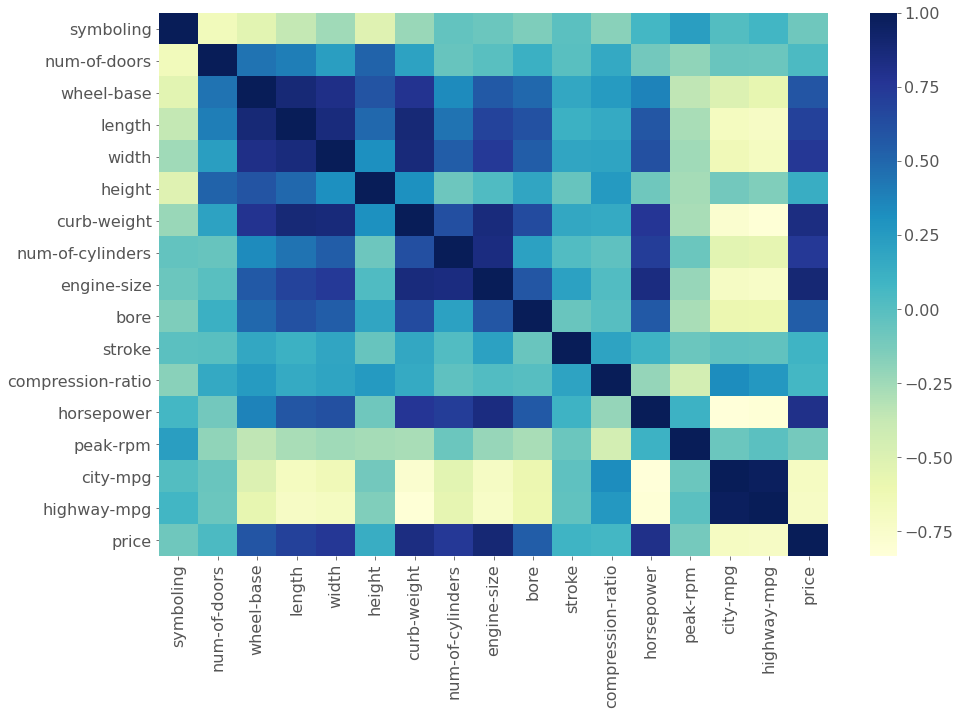

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(automobile.corr(),annot =False, cmap='YlGnBu');

# Price estimation
the price of a car depends on three major factors.

First, the brand (make).

Second, the performance (engine, horsepower).

Third, the car specifications(curb weight).

Lets check our estimation through visual representation.

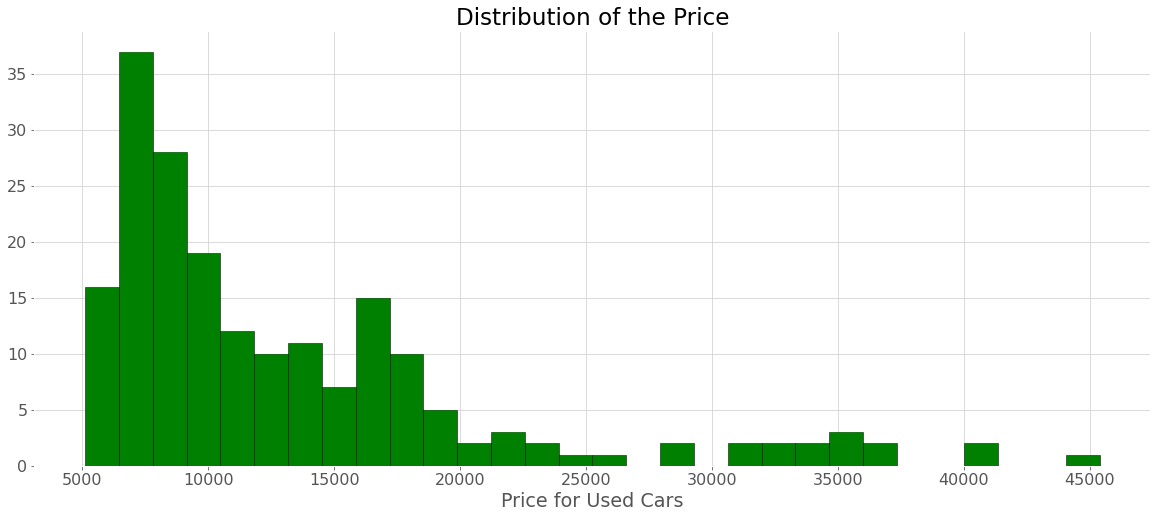

In [22]:
# automobile.groupby('make').mean().round(2).T
fig, ax=plt.subplots()
ax.hist(automobile.price, color='green', bins=30, edgecolor = 'black')
ax.set_title('Distribution of the Price')
ax.set_xlabel("Price for Used Cars");


# Findings:
-The avarege car price is between 5000 and 35000.

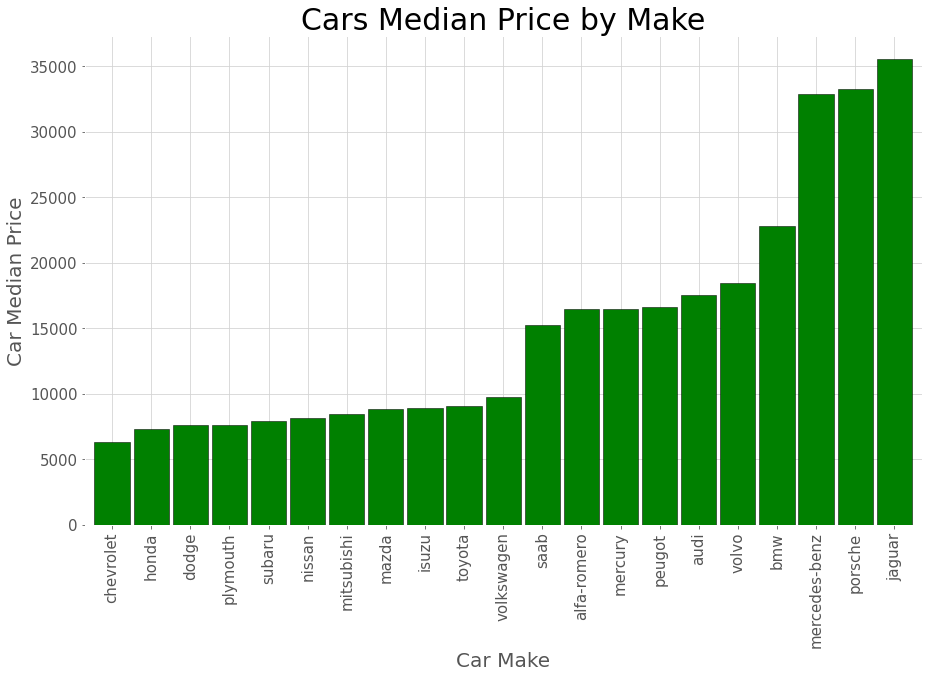

In [23]:
fig, ax=plt.subplots(figsize=(15,9))
ax=automobile.groupby('make').price.median().sort_values().plot.bar(width=0.9, color='green', edgecolor = 'black', align='center', zorder=3)
# for p in ax.patches:
#     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1), size=8)
plt.xlabel('Car Make',fontsize=20)
plt.ylabel('Car Median Price',fontsize=20)
plt.title('Cars Median Price by Make',fontsize=30)
ax.tick_params(labelsize=15)
# for label in ax.get_xticklabels():
# ax.set_ha("center")
plt.xticks(rotation=90)
# ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=65, ha='center')
plt.show();

# Findings:
    ○ The most expensive car is manufactured by Jaquar and the least expensive is Chevrolet
    ○ The premium cars costing more than 20000 are BMW, Mercedes benz and Porsche
    ○ Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru
    ○ Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars

# How many cars each Manufacterer has

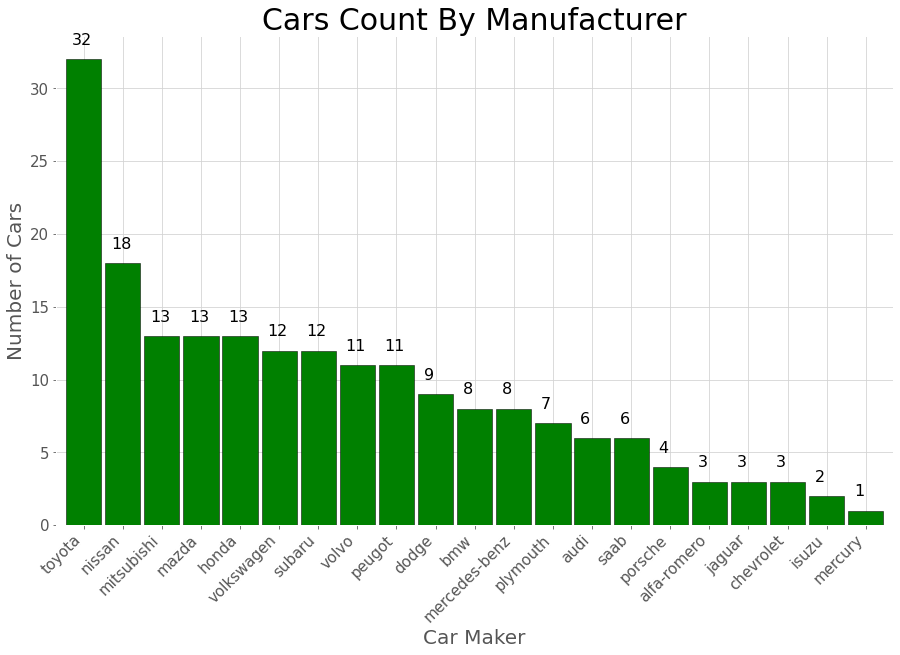

In [24]:
fig, ax=plt.subplots(figsize=(15,9))
ax=automobile['make'].value_counts().plot.bar(width=0.9, color='green', edgecolor = 'black', align='center', zorder=3)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
#plt.yticks(rotation='vertical')
plt.show()


# Findings:
Toyota is the Brand which has the majority of the cars in the dataset.

# Showing how many Japanese cars in the dataset in comparision to the total number of cars

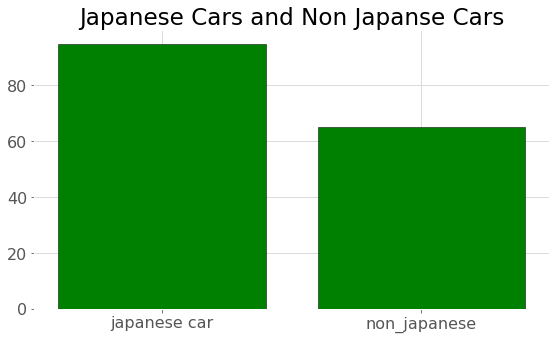

In [25]:
# the japanese car are Toyota, Honda, Nissan, Mazda, Mitsubishi, Subaru, Isuzu.
japanese_car=(automobile.loc[automobile.make == 'toyota', 'make'].count() +\
  automobile.loc[automobile.make == 'nissan','make'].count() +\
automobile.loc[automobile.make == 'mazda', 'make'].count() +\
automobile.loc[automobile.make == 'honda', 'make'].count() +\
    automobile.loc[automobile.make == 'mitsubishi', 'make'].count() +\
automobile.loc[automobile.make == 'subaru', 'make'].count() +\
    automobile.loc[automobile.make == 'isuzu','make'].count())
non_japanese=len(automobile.make)- japanese_car
fig, ax=plt.subplots(figsize=(8, 5))
width=0.9
x=['japanese car','non_japanese']
y=[95, 65]
ax.bar(x,y,color='green', edgecolor = 'black')
plt.title('Japanese Cars and Non Japanse Cars')
plt.tight_layout();

# Findings:
There are more Japanese Cars in the Dataset followed by European.
Toyota,Nissan,Mazda and Honda are all Japanese car makers,This is due customers prefer smaller and more fuel efficient cars made by the japanese car makers.

# Zooming into the correlation between the Price and Symboling, Horsepower, curb weight, and Engine size.

# 

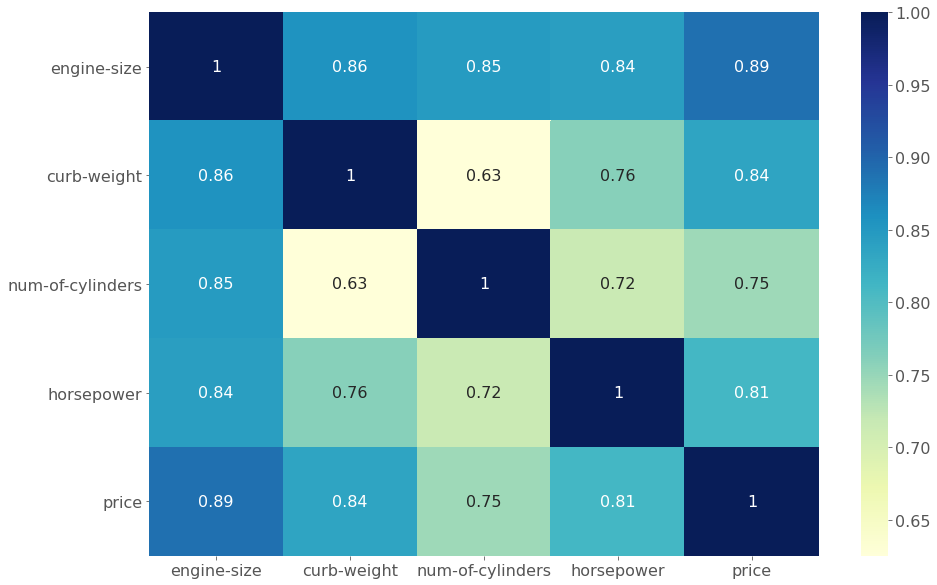

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(automobile[['engine-size','curb-weight','num-of-cylinders','horsepower','price']].corr(),annot = True, cmap='YlGnBu');

# Findings:

-The price is directly correlated with the engine size, curb-weight, num-of-cylinders and horsepower.


# 

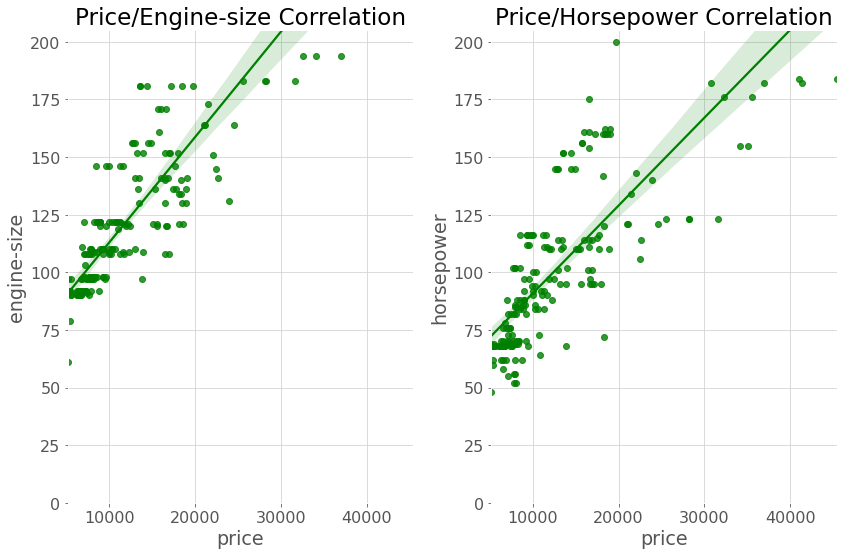

In [27]:

fig, axs = plt.subplots(figsize=(12,8
                                ),ncols=2, nrows= 1)
engine_size=sns.regplot(x='price', y='engine-size', ci=95, color='green', data=automobile, ax=axs[0])
axs[0].set_title('Price/Engine-size Correlation')
engine_size.set(ylim=(0,205))
horse_power=sns.regplot(x='price', y='horsepower',ci=95, color='green', data=automobile, ax=axs[1], label='horsepower/Price/postive correlation')
horse_power.set(ylim=(0,205))
axs[1].set_title('Price/Horsepower Correlation')

plt.tight_layout()
plt.show();



# Findings:
-This the best fit line along with showing the 95% confidence interval, that the price is directly correlated with the engine size.

-This the best fit line along with showing the 95% confidence interval, the price is directly correlated with the horsepower in 95% confidence interval. 


# 

# 

In [28]:
automobile['drive-wheels'].value_counts()

fwd    116
rwd     71
4wd      8
Name: drive-wheels, dtype: int64

# Boxplot of Drive wheels and Price

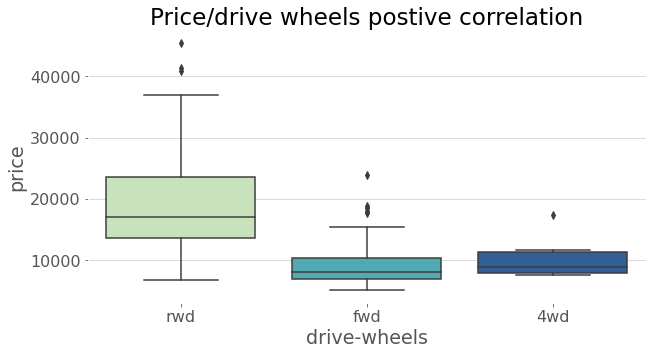

In [29]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=automobile, palette='YlGnBu')
ax = plt.gca()
ax.set_title("Price/drive wheels postive correlation");


# Findings: 
the car has 3 diffrient drive wheel types which they are fwd, 4wd, and rwd. It's very evident that the Rear wheel drive cars are most expensive and front wheel is least expensive cars. Four wheel drive cars are little higher than the front wheel drive cars. There is very less number of four wheel drive cars in our dataset so this picture might not be very accurate.# 

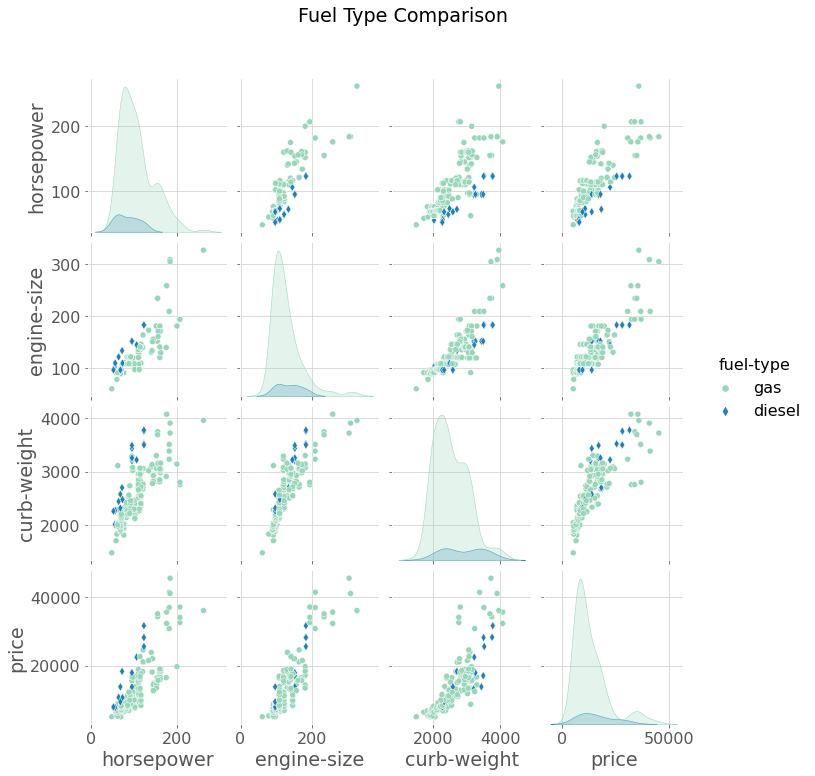

In [30]:
# plt.title('Fuel Type Comparison')
g=sns.pairplot(automobile[["horsepower", "engine-size", "curb-weight","price", "fuel-type"]],
                 hue="fuel-type", palette='YlGnBu', markers=['o', 'd'])
g.fig.suptitle("Fuel Type Comparison", y=1.08);





# Findings:
- The price increases when the horsepower increase when the fuel type is either gas or diesel.

-The price increases when the engine size increase when the fuel type it either gas or diesel.

-The price increases more along with the curb weight increase when the fuel type is diesel.



#Hypothese testing

H0=mu for the symboling of the expensive car = mu of the symboling of cheap car

Ha=mu for the symboling of the expensive car  not= mu of the symboling of cheap car

alpha=0.05

In [31]:
#the Costs for full-size cars stayed even with 1985 levels at $6,298.
bins = [0,6298,np.inf]
names = ['low_price','expensive_car']

automobile['price_range'] = pd.cut(automobile.price, bins, labels=names)

# automobile.reset_index(inplace=True)
# automobile.drop('index', axis=1, inplace=True)
low_price = automobile[automobile['price_range'] == 'low_price']['symboling']
high_price=automobile[automobile['price_range'] == 'expensive_car']['symboling']

res=stats.mannwhitneyu(low_price,high_price, alternative="two-sided")
res


MannwhitneyuResult(statistic=1678.0, pvalue=0.03727716675988326)

In [32]:
high_price_mean=[]
[high_price_mean.append(np.mean(np.random.choice(high_price, len(high_price), replace=True))) for _ in range(1000)]
low_price_mean=[]
[low_price_mean.append(np.mean(np.random.choice(low_price, len(low_price), replace=True))) for _ in range(1000)]
high_price_mean ,low_price_mean
# med=[]
# [med.append(np.mean(np.random.choice(automobile.price, len(automobile.price), replace=True))) for _ in range(1000)]
# med

([0.7071823204419889,
  0.7292817679558011,
  0.7071823204419889,
  0.9060773480662984,
  0.7016574585635359,
  0.8121546961325967,
  0.856353591160221,
  0.6519337016574586,
  0.6629834254143646,
  0.7458563535911602,
  0.7403314917127072,
  0.7790055248618785,
  0.8232044198895028,
  0.8674033149171271,
  0.7624309392265194,
  0.7237569060773481,
  0.5193370165745856,
  0.6519337016574586,
  0.6132596685082873,
  0.8287292817679558,
  0.56353591160221,
  0.861878453038674,
  0.7403314917127072,
  0.8342541436464088,
  0.8397790055248618,
  0.850828729281768,
  0.7403314917127072,
  0.8121546961325967,
  0.7955801104972375,
  0.7182320441988951,
  0.6850828729281768,
  0.7292817679558011,
  0.712707182320442,
  0.8066298342541437,
  0.7569060773480663,
  0.7348066298342542,
  0.8453038674033149,
  0.712707182320442,
  0.7790055248618785,
  0.8453038674033149,
  0.7513812154696132,
  0.8453038674033149,
  0.7182320441988951,
  0.850828729281768,
  0.7182320441988951,
  0.76243093922651

In [33]:
high_price.value_counts()

 0    64
 1    42
 2    27
 3    23
-1    22
-2     3
Name: symboling, dtype: int64

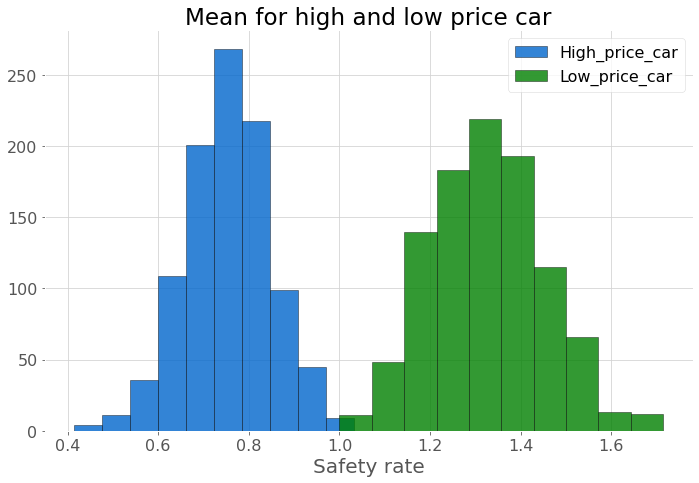

In [34]:
fig, ax=plt.subplots(figsize=(10, 7))
width=0.9
ax.hist(high_price_mean,color='#0066cc',alpha=0.8, edgecolor = 'black', label='High_price_car')
ax.hist(low_price_mean,color='g', alpha=0.8, edgecolor = 'black', label='Low_price_car')
plt.title('Mean for high and low price car')
plt.xlabel("Safety rate",fontsize=20)
# sns.distplot(high_price_mean, hist=True, kde=True, 
#              bins=200,color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
plt.legend()
plt.tight_layout();

# Findings:
With using the Mann-Whitney U Test, and the range of the low price for the car in 1985 which was $ 6,298, the result was:

p value=0.037

And I reject the null value, and Yes the expensive car is more safe.


# 

# Machinle Learining part

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   make               195 non-null    object 
 2   fuel-type          195 non-null    object 
 3   aspiration         195 non-null    object 
 4   num-of-doors       195 non-null    int64  
 5   body-style         195 non-null    object 
 6   drive-wheels       195 non-null    object 
 7   engine-location    195 non-null    object 
 8   wheel-base         195 non-null    float64
 9   length             195 non-null    float64
 10  width              195 non-null    float64
 11  height             195 non-null    float64
 12  curb-weight        195 non-null    int64  
 13  engine-type        195 non-null    object 
 14  num-of-cylinders   195 non-null    int64  
 15  engine-size        195 non-null    int64  
 16  fuel-system        195 non

In [23]:
new_df = automobile.filter(['make','fuel-type','num-of-doors', 'drive-wheels', 'num-of-cylinders', 'price'], axis=1)
new_df

,make,fuel-type,num-of-doors,drive-wheels,num-of-cylinders,price
0,alfa-romero,gas,2,rwd,4,13495.0
1,alfa-romero,gas,2,rwd,4,16500.0
2,alfa-romero,gas,2,rwd,6,16500.0
3,audi,gas,4,fwd,4,13950.0
4,audi,gas,4,4wd,5,17450.0
...,...,...,...,...,...,...
200,volvo,gas,4,rwd,4,16845.0
201,volvo,gas,4,rwd,4,19045.0
202,volvo,gas,4,rwd,6,21485.0
203,volvo,diesel,4,rwd,6,22470.0


In [24]:
data=pd.get_dummies(new_df,columns=["make", "fuel-type", "drive-wheels"], prefix=["make","fuel", "drive"])
data.head()

,num-of-doors,num-of-cylinders,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_diesel,fuel_gas,drive_4wd,drive_fwd,drive_rwd
0,2,4,13495.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,4,16500.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,6,16500.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,4,13950.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,4,5,17450.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [25]:
X=data.drop('price',1)
y=data['price']
X.shape, y.shape

((195, 28), (195,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58, 28), (137, 28), (58,), (137,))

# Using Pipline

In [49]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('KNR', KNeighborsRegressor())])

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)

# Get Model Performance
KNN_score=pipe.score(X_test, y_test)
KNN_score

0.7350734381623042

In [50]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('Linearregression', LinearRegression())])

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)

# Get Model Performance
LR_score=pipe.score(X_test, y_test)
LR_score

0.810271958243323

In [51]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('Ridge', Ridge())])

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)


# Get Model Performance
R_score=pipe.score(X_test, y_test)
R_score

0.8116729073657153

In [52]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('DTregrosser', DecisionTreeRegressor())])

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)


# Get Model Performance
DT_score=pipe.score(X_test, y_test)
DT_score

0.7571627669592483

In [53]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('GB', GradientBoostingRegressor())])

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)


# Get Model Performance
GB_score=pipe.score(X_test, y_test)
GB_score

0.8652138461859191

In [54]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('Bagregrosser', BaggingRegressor())])

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)


# Get Model Performance
Bag_score=pipe.score(X_test, y_test)
Bag_score

0.8638166698483266

In [55]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('RandomForest', RandomForestRegressor())])

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)


# Get Model Performance
RF_score=pipe.score(X_test, y_test)
RF_score

0.8703522415714677

In [57]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on Accuracy")
x.field_names = ["Model", "R^2 score"]

x.add_row(["KNeighbors Regressor Algorithm", round(KNN_score,4)])
x.add_row(["Linear Regression Algorithm", round(LR_score,4)])
x.add_row(["Ridge Algorithm",  round(R_score,4)])
x.add_row(["Decision Tree Regressor Algorithm", round(DT_score,4)])
x.add_row(["Gradient Boosting Regressor Algorithm", round(GB_score,4)])
x.add_row(["Bagging Regressor Algorithm", round(Bag_score,4)])
x.add_row(["Random Forest Algorithm", round(RF_score,4)])

print(x)
print('\n')



Comparison of all algorithms on Accuracy
+---------------------------------------+-----------+
|                 Model                 | R^2 score |
+---------------------------------------+-----------+
|     KNeighbors Regressor Algorithm    |   0.7351  |
|      Linear Regression Algorithm      |   0.8103  |
|            Ridge Algorithm            |   0.8117  |
|   Decision Tree Regressor Algorithm   |   0.7572  |
| Gradient Boosting Regressor Algorithm |   0.8652  |
|      Bagging Regressor Algorithm      |   0.8638  |
|        Random Forest Algorithm        |   0.8704  |
+---------------------------------------+-----------+




# Conclusion
-This dataset tells us that expensive cars are more safe

This dataset also tells us that the price is strongly related to the brand, engine size, horsepower, curb weight, drive wheel and fuel type. 

1-Brand: Jaguar is the most expensive car.

2-Performance: when engine size, and horsepower increase the price increases.

3-Specifications:

  -The Rear wheel drive are most expensive car in this dataset.
  
  -curb weight increase the price increases, especially when fuel type is diesel.
  
4- By using dffrient Machine Learning algorthims, Random Forest Algorithm gave the best acuracy score 87%.


# Further Study

- Applying Deep Learning algorithm in predicting the car price.
- Exploreing the price difference between Japanese and non-Japanese cars.

